# Global property study

In this note, we study various global properties of our protocol.
1. We study the overlap between the "unwinded state" and the $|0\rangle$ state.
2. Next, we study the correlation between different qubits.

## 1. Global overlap

Here, we apply the unwinding protocol and estimate the overlap between $|0\ldots 0\rangle$ state and the reduced density matrix of the first, say $k$ qubits. The goal is to understand the functional form of the overlap in terms of $k$. More specifically, let $\rho_k$ be the reduced density matrix over the first $k$ qubits. We numerically estimate
$$
\begin{equation}
f(k):=\langle 0^k| \rho_k |0^k\rangle.
\end{equation}
$$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import csim as cs

In [3]:
noise_level = 0.001

In [5]:
# Getting the data
overlaps_cumulative = []
n_q = 30
for l in tqdm(range(n_q)):
    overlap_temp = []
    for x in tqdm(range(1000)):
        sam, c_length = cs.sample_ladder(n_q, all_same=True)
        mymps = cs.compute_mps(n_q, sam)
        overlap_temp.append(mymps.probability_zero_at_sites([i for i in range(l)]))
    overlaps_cumulative.append(overlap_temp)

KeyboardInterrupt: 

In [49]:
# Computing the average and standard deviation
overlap_avg = []
overlap_std = []
for overlaps in overlaps_cumulative:
    overlap_avg.append(np.mean(overlaps))
    overlap_std.append(np.std(overlaps))

overlap_avg

[0.999999999999998,
 0.9567645911499596,
 0.9429104242937326,
 0.9370006153892763,
 0.9268707206596498,
 0.9349394195445587,
 0.9300752409030452,
 0.9201270267706188,
 0.9195819502491935,
 0.9222207861284007,
 0.9133027609925696,
 0.9029766569786652,
 0.8988610530870758,
 0.9000775113741956,
 0.8933489603799083,
 0.8833878333951443,
 0.8644569878359885,
 0.8537234443177504,
 0.8399980450728656,
 0.8362916977118321,
 0.813725644862883,
 0.7971231942570834,
 0.7718635596258633,
 0.7607289188879399,
 0.7289796658092452,
 0.687111429763936,
 0.6503637754704966,
 0.5843378538414452,
 0.49230591734643997,
 0.3604167551579496]

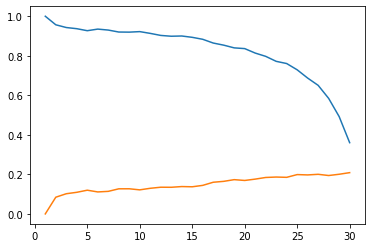

In [48]:
# Plotting
# Blue is average. Yellow is standard deviation
x=np.linspace(1,n_q, n_q)
plt.plot(x,overlap_avg)
plt.plot(x,overlap_std)
plt.show()

## 2. Correlation

We saw that the overlap, even at the noise level of $0.001$, which is very low compared to what people can achieve now, the overlap is at around $90 \sim 95\%$ range for $k=1 \sim 15$. There's good and bad news to this. The good news is that the entropy is rather low. The bad news is that we cannot use these qubits directly, because they may be highly correlated. (That can lead to a correlated error of $~5\%$, which is not good.) Below, we would like to quantify the correlation between two qubits.

As a simple start, we will conduct the following experiment. Pick two sites, say $i$ and $j\neq i$, and compute the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). 

In [3]:
# Testing
n_q=30
circ = cs.sample_ladder(n_q)
m = cs.compute_mps(n_q, circ)
cs.get_correlation(m,1,2)

0.5340906905112319

In [4]:
cs.sample_correlation(30,1,5, 100)

[0.3727114434714284,
 0.5298834588938593,
 0.4750432468565587,
 0.11624759567899996,
 0.32518129972499604,
 0.18308831263420383,
 0.2691691542439487,
 0.18846473506424327,
 0.4848637455082119,
 0.36528288010902676,
 0.1423942153271085,
 0.4383925029523077,
 0.49559935659872606,
 0.030177256083752706,
 0.3037523820759145,
 0.4354084251186833,
 0.37035799641734674,
 0.6015082965952937,
 0.5534654874234756,
 0.48420193794562494,
 0.5333592936689142,
 0.5163841202887844,
 0.2871601222967848,
 0.12525696498035385,
 0.49972490132843644,
 0.4815636224483594,
 0.3297290466889203,
 0.49729258889068706,
 0.19861324598012572,
 0.41678284818288786,
 0.24627633873455987,
 0.3400519833813854,
 0.3677940466858981,
 0.23113232802566996,
 0.1491356048618385,
 0.19990578553783614,
 0.18277635087877983,
 0.25724122054668647,
 0.40745979218621603,
 0.3808092982968603,
 0.29811729974184226,
 0.11753056832222103,
 0.37913506154896714,
 0.41875045742000905,
 0.20371084813066473,
 0.3829836729185381,
 0.32987

In [6]:
correlations = []
for i in tqdm(range(2,n_q)):
    correlations.append(cs.sample_correlation(n_q,1,i, 100))

/Users/ikim/Documents/Code/cooling/csim.py:173: RuntimeWarning: invalid value encountered in sqrt
  std_i = np.sqrt(pi * (1-pi))


In [10]:
correlations_avg = []
for cor in correlations:
    correlations_avg.append(np.mean(cor))

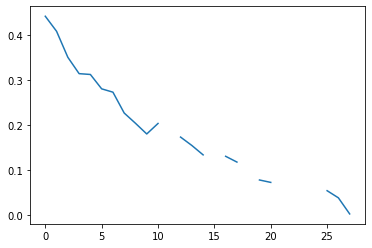

In [12]:
# Correlation decays with the separation.
plt.plot(correlations_avg)

With this experiment, one can see that correlation between two qubits decay in distance. Now, we move onto a more global form of correlation. We estimate the probability that the first $k$ qubits of the chain are in the $|1\rangle$ state simulatneously. If the noise is nearly independent, we would need to see an exponential decay. 

In [11]:
cs.correlated_flip_probability(30,5)

array(0.00040102)

In [19]:
n_q = 50
samples = 1000
samples_all = []
for i in tqdm(range(1, n_q)):
    temp = []
    for j in tqdm(range(samples)):
        temp.append(cs.correlated_flip_probability(n_q, i))
    samples_all.append(temp)

In [20]:
len(samples_all[0])

1000

In [23]:
samples_avg=[]
samples_median = []
for sample in samples_all:
    samples_avg.append(np.mean(sample))
    samples_median.append(np.median(sample))

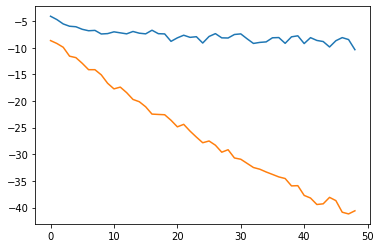

In [25]:
# Oragne median, blue mean
plt.plot(np.log(samples_avg))
plt.plot(np.log(samples_median))

In this plot, we see that there is a very big difference between the median and mean. The mean decays but than saturates, which suggests that there is a form of correlated error. On the other hand, the mean decays exponentially, which suggests that indeed the probability that $k$ bits are flipped simultaneously decays exponentially in $k$.

In [11]:
cs.correlated_flip_probability_extra(30,5)

(array(1.03005714e-07), 4.303781559800611)

In [30]:
n_q = 50
samples = 1000
samples_all = []
for i in tqdm(range(1, n_q)):
    temp = []
    for j in tqdm(range(samples)):
        temp.append(cs.correlated_flip_probability_extra(n_q, i))
    samples_all.append(temp)

In [41]:
# Prune the data so that the correlation length is less than the correlation_length_cutoff.
# We are trying to understand if we can remove the outliers this way.
samples_avg=[]
samples_median = []
correlation_length_cutoff = 5
for sample in samples_all:
    sample_pruned = [s[0] for s in sample if s[1]<correlation_length_cutoff]
    print(len(sample))
    print(len(sample_pruned))
    samples_avg.append(np.mean(sample_pruned))
    samples_median.append(np.median(sample_pruned))

1000
819
1000
816
1000
813
1000
830
1000
855
1000
827
1000
828
1000
825
1000
821
1000
829
1000
820
1000
823
1000
830
1000
830
1000
833
1000
820
1000
824
1000
837
1000
816
1000
827
1000
831
1000
830
1000
825
1000
831
1000
840
1000
807
1000
831
1000
835
1000
830
1000
824
1000
824
1000
825
1000
810
1000
804
1000
792
1000
827
1000
828
1000
806
1000
805
1000
810
1000
828
1000
802
1000
816
1000
821
1000
828
1000
829
1000
809
1000
812
1000
812


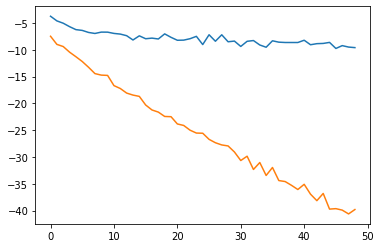

In [42]:
plt.plot(np.log(samples_avg))
plt.plot(np.log(samples_median))